# 1. Environment Setup

In [250]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import requests
import urllib

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [251]:
df = pd.read_csv('crop_yield_data.csv')
df.head()

,rainfall_mm,fertilizer_kg,farm_size_hectares,crop_yield
0,1622.522582,1124.587232,708.423312,404
1,1390.375889,1805.293679,858.751712,556
2,897.609007,1284.820461,730.696491,397
3,1278.975128,2541.062578,460.511046,276
4,1891.221108,692.496000,915.663048,546


In [252]:
# Assuming df is your DataFrame
X = df.drop(columns='crop_yield')
y = df['crop_yield']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 1.3 Plotting Function

In [253]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    sns.lineplot(x=y_true, y=y_true, color='red')  # Perfect prediction line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

# 2. Linear Regression

Linear Regression - MSE: 4305.5219, R²: 0.7966


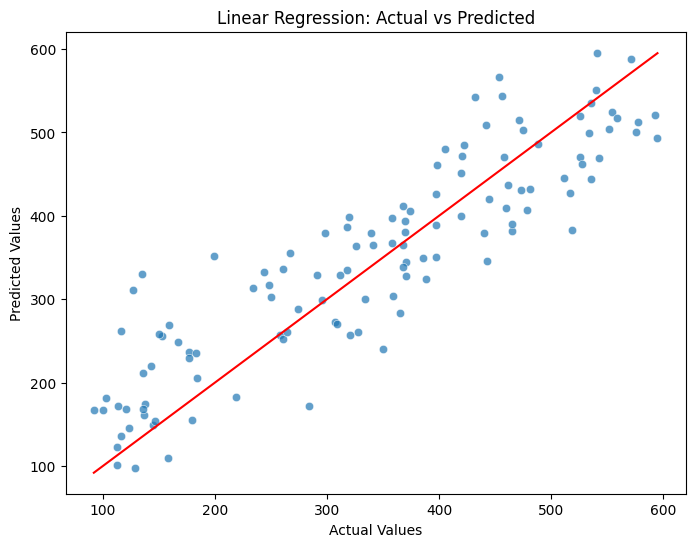

In [254]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
plot_actual_vs_predicted(y_test, y_pred_linear, 'Linear Regression: Actual vs Predicted')


# 3. Ridge Regression

Ridge Regression - MSE: 4305.5219, R²: 0.7966


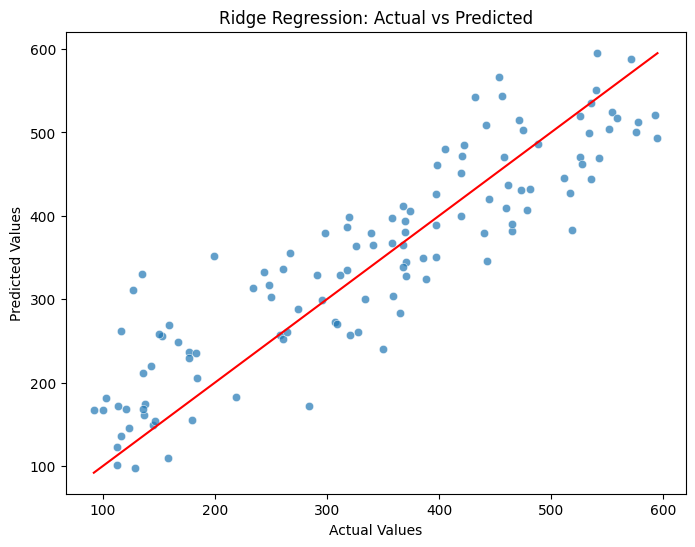

In [255]:
# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
plot_actual_vs_predicted(y_test, y_pred_ridge, 'Ridge Regression: Actual vs Predicted')


## 3.1 Alpha Grid Search Optimizer

Best Alpha: 0.0010
Best R2: 0.7966


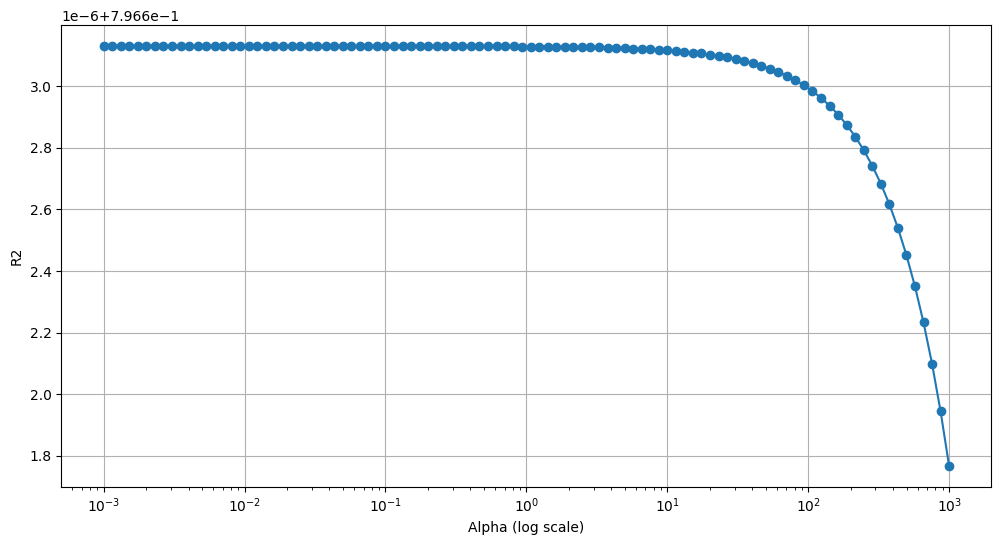

In [289]:
# Initialize a range of alpha values to test
alpha_values = np.logspace(-3, 3, 100)  # From 0.001 to 1000 (log scale)
r2_scores = []

# Optimize alpha
for alpha in alpha_values:
    # Initialize Ridge Regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_ridge = ridge_model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred_ridge)
    r2_scores.append(r2)

# Find the best alpha (max r2)
best_alpha = alpha_values[np.argmax(r2_scores)]
best_r2 = min(r2_scores)
print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best R2: {best_r2:.4f}")

# Plot the performance of alpha over time
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, r2_scores, label="R2", marker="o")
plt.xscale("log")  # Use log scale for alpha
plt.xlabel("Alpha (log scale)")
plt.ylabel("R2")

plt.grid()
plt.show()

# 4. LASSO Regression

Lasso Regression - MSE: 4305.5221, R²: 0.7966


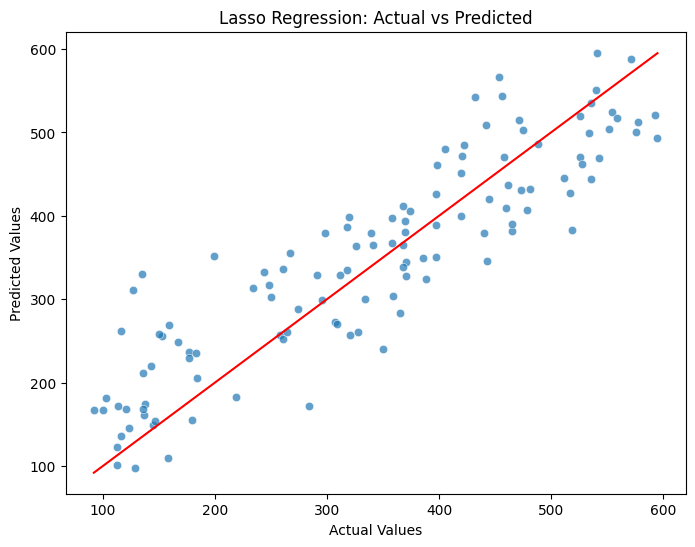

In [256]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.5)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")
plot_actual_vs_predicted(y_test, y_pred_lasso, 'Lasso Regression: Actual vs Predicted')

## 4.1 Alpha Grid Search Optimizer

Best Alpha: 0.0010
Best R2: 0.7959


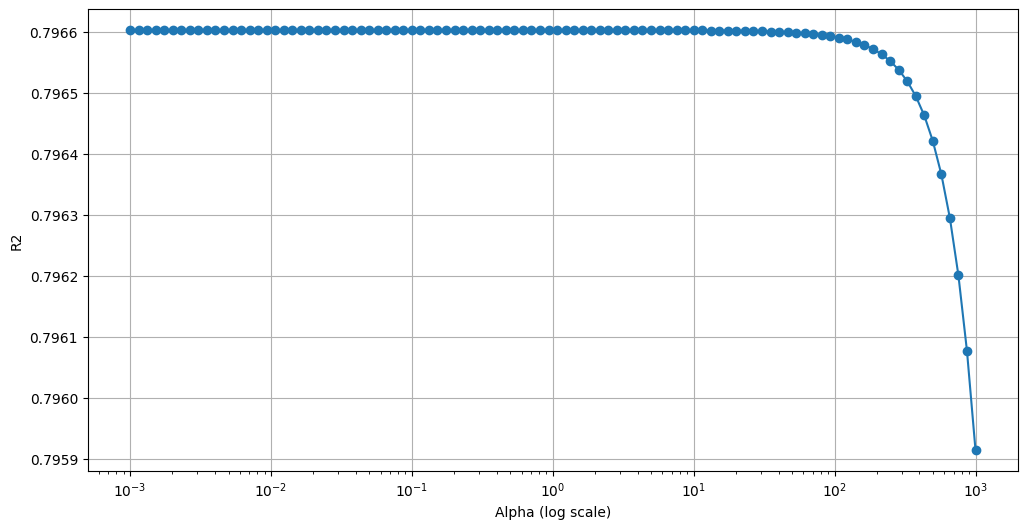

In [288]:
# Initialize a range of alpha values to test
alpha_values = np.logspace(-3, 3, 100)  # From 0.001 to 1000 (log scale)
r2_scores = []

# Optimize alpha
for alpha in alpha_values:
    # Initialize LASSO Regression model with the current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_lasso = lasso_model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred_lasso)
    r2_scores.append(r2)

# Find the best alpha (max r2)
best_alpha = alpha_values[np.argmax(r2_scores)]
best_r2 = min(r2_scores)
print(f"Best Alpha: {best_alpha:.4f}")
print(f"Best R2: {best_r2:.4f}")

# Plot the performance of alpha over time
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, r2_scores, label="R2", marker="o")
plt.xscale("log")  # Use log scale for alpha
plt.xlabel("Alpha (log scale)")
plt.ylabel("R2")

plt.grid()
plt.show()

# 5. Polynomial Regression

Polynomial Regression (Degree 3) - MSE: 4221.1619, R²: 0.8006


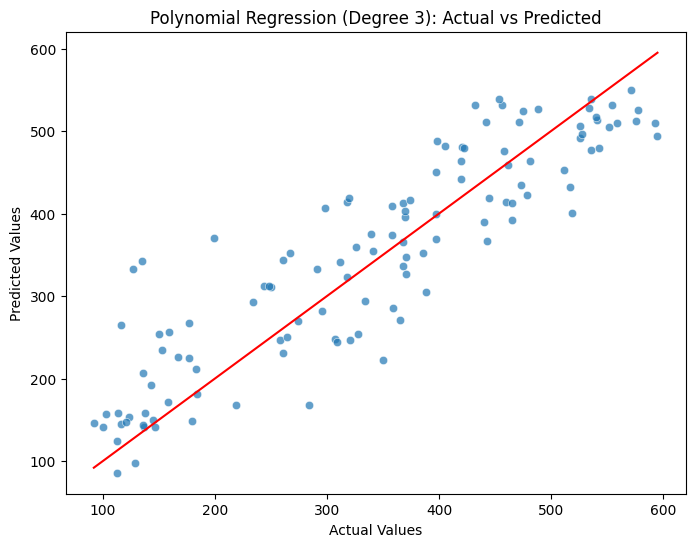

In [257]:
# Define the degree of the polynomial
degree = 3  # You can experiment with different degrees

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")
plot_actual_vs_predicted(y_test, y_pred_poly, f'Polynomial Regression (Degree {degree}): Actual vs Predicted')


# 6. Comparisons

In [258]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', f'Polynomial Regression (Degree {degree})'],
    'MSE': [mse_linear, mse_ridge, mse_lasso, mse_poly],
    'R²': [r2_linear, r2_ridge, r2_lasso, r2_poly]
})

display(results)

,Model,MSE,R²
0,Linear Regression,4305.521887,0.796603
1,Ridge Regression,4305.521916,0.796603
2,Lasso Regression,4305.522106,0.796603
3,Polynomial Regression (Degree 3),4221.161852,0.800588


# 7. Cross Validation

## 7.1 Random Sampling

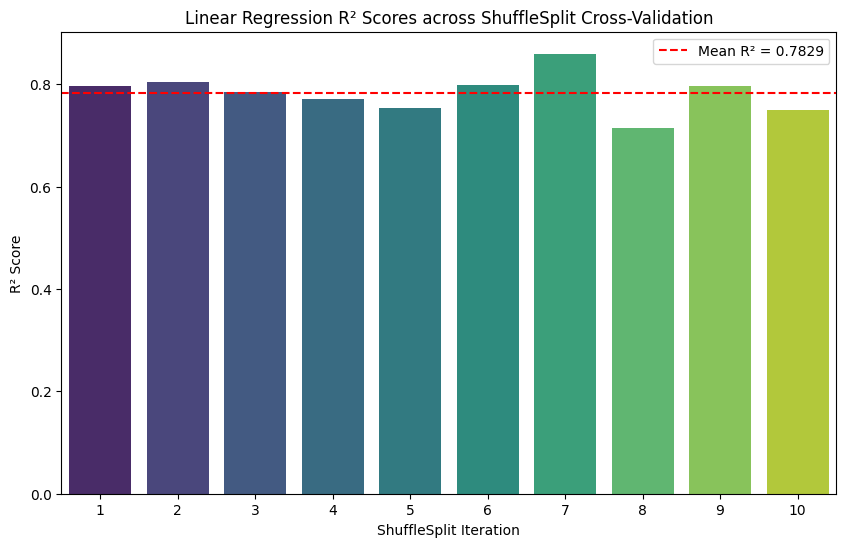

In [259]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Define the cross-validation strategy
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=shuffle_split, scoring='r2')

# Plot R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(cv_scores)+1)), y=cv_scores, palette='viridis')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean R² = {cv_scores.mean():.4f}')
plt.title('Linear Regression R² Scores across ShuffleSplit Cross-Validation')
plt.xlabel('ShuffleSplit Iteration')
plt.ylabel('R² Score')
plt.legend()
plt.show()

## 7.2 K-folds

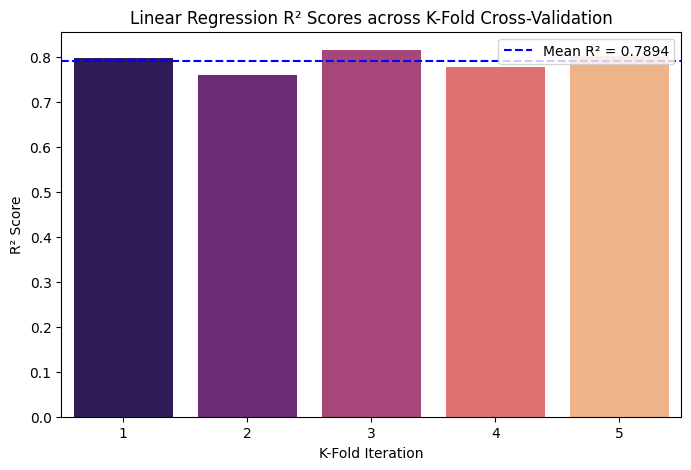

In [260]:
from sklearn.model_selection import KFold

linear_model_kfold = LinearRegression()

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_kfold = cross_val_score(linear_model_kfold, X, y, cv=kfold, scoring='r2')

# Plot R² scores for K-Fold
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, len(cv_scores_kfold)+1)), y=cv_scores_kfold, palette='magma')
plt.axhline(y=cv_scores_kfold.mean(), color='blue', linestyle='--', label=f'Mean R² = {cv_scores_kfold.mean():.4f}')
plt.title('Linear Regression R² Scores across K-Fold Cross-Validation')
plt.xlabel('K-Fold Iteration')
plt.ylabel('R² Score')
plt.legend()
plt.show()